In [245]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az 

In [268]:
# reading the RL model span
file_name = 'models/RL_W.stan' 
file_read = open(file_name, 'r')
stan_model = file_read.read()

# reading the observed data
session = 1
subName = 'sub-076'
direc = "sub-X47863_ses-01_task-DA_run-2_beh_20211221_11-26-32"
examples_dir = "../data/" + subName + "/ses-0" + str(session+1) + "achieva7t/" + direc + ".csv"
df = pd.read_csv(examples_dir)
dfCond = df[df.block == 'Act']

In [269]:
firstCond = dfCond.stimActFirst.to_numpy()[0]

resAct = dfCond['pushed'].to_numpy().astype(int)
pushed = np.where(resAct==1)[0] + 1
pulled = np.where(resAct==0)[0] + 1
noRes  = np.where(resAct < 0)[0] + 1

corrAct= dfCond['pushCorrect']
pushCorr = np.where(corrAct==1)[0] + 1
pulledCorr = np.where(corrAct==0)[0] + 1


pltData = ({'label': ['pushed', 'push correct', 'no response', 'pull correct', 'pulled'],
            'choise': [pushed, pushCorr, noRes, pulledCorr, pulled]})
dfPlot = pd.DataFrame(pltData)

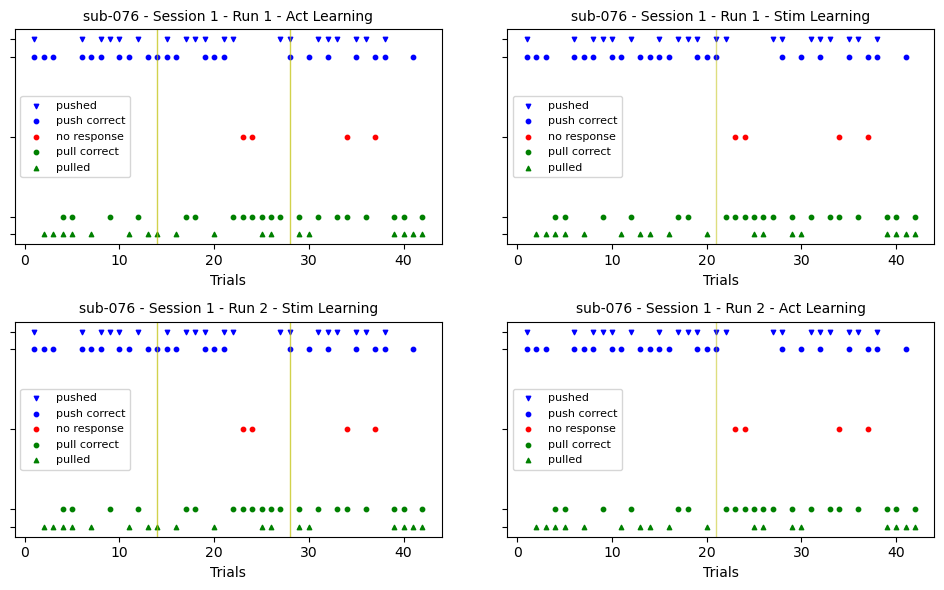

In [270]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)

columns = 2
rows = 2

y = [3.2 ,3, 2.1 , 1.2, 1] 
markers = ['v', 'o', 'o' , 'o', '^']
colors =['blue','blue', 'red', 'green', 'green']

if (firstCond == 'Act' and session == 1) or (firstCond == 'Stim' and session == 2):
    titles = [subName + ' - Session ' + str(session) + ' - Run 1 - Act Learning', 
              subName + ' - Session ' + str(session) + ' - Run 1 - Stim Learning' ,
              subName + ' - Session ' + str(session) + ' - Run 2 - Stim Learning',
              subName + ' - Session ' + str(session) + ' - Run 2 - Act Learning']
elif (firstCond == 'Stim' and session == 1) or (firstCond == 'Act' and session == 2):
    titles = [subName + ' - Session ' + str(session) + ' - Run 1 - Stim Learning', 
              subName + ' - Session ' + str(session) + ' - Run 1 - Act Learning' ,
              subName + ' - Session ' + str(session) + ' - Run 2 - Act Learning',
              subName + ' - Session ' + str(session) + ' - Run 2 - Stim Learning']


for idx in range(columns*rows):
    fig.add_subplot(rows, columns, idx + 1)
    #create a list of y coordinates for every x coordinate
    for i in range(len(dfPlot)):
        plt.scatter(dfPlot.choise[i],[y[i] for j in range(len(dfPlot.choise[i]))], 
                    s=10, c=colors[i], marker=markers[i])


    plt.yticks(y,[]) #show the empy y axis label
    plt.legend(dfPlot.label, fontsize=8)
    plt.xlabel('Trials', fontsize=10)
    plt.title(titles[idx], fontsize=10)
    
    if idx%2==1:
        plt.axvline(x = 21, color='y', linewidth=1, alpha=.5)
    else:
        plt.axvline(x = 14, color='y', linewidth=1, alpha=.7)
        plt.axvline(x = 28, color='y', linewidth=1, alpha=.7)

plt.subplots_adjust(wspace=10.)
plt.show()

# fig.savefig('out.png', dpi=300)